<a href="https://colab.research.google.com/github/HisakaKoji/test/blob/master/chapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title 4章　ニューラルネットワークの学習



In [0]:
#@title 4.2.1 ２乗和誤差

In [2]:
import numpy as np
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]

def mean_squared_error(y,t):  
  return 0.5 * np.sum((y-t)**2)

mean_squared_error(np.array(y),np.array(t))

0.09750000000000003

In [3]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
mean_squared_error(np.array(y),np.array(t))

0.5975

In [0]:
#@title 4.2.2 交差エントロピー誤差

In [0]:
def cross_entropy_error(y,t):
  delta = 1e-7
  return -np.sum(t* np.log(y+delta))

In [6]:
t = [0,0,1,0,0,0,0,0,0,0]
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [9]:
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
cross_entropy_error(np.array(y),np.array(t))

2.302584092994546

In [0]:
import sys,os

In [11]:
%ls

sample_data/


In [12]:
!git clone https://github.com/oreilly-japan/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 400, done.
remote: Total 400 (delta 0), reused 0 (delta 0), pack-reused 400
Receiving objects: 100% (400/400), 5.25 MiB | 33.61 MiB/s, done.
Resolving deltas: 100% (206/206), done.


In [13]:
%ls

deep-learning-from-scratch/  sample_data/


In [0]:
sys.path.append("./deep-learning-from-scratch")

In [0]:
import numpy as np
from dataset.mnist import load_mnist

In [16]:
(x_train,t_train),(x_test,t_test) = \
  load_mnist(normalize=True,one_hot_label=True)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [17]:
print(x_train.shape)

(60000, 784)


In [18]:
print(t_train.shape)

(60000, 10)


In [0]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)

In [21]:
batch_mask

array([49304, 49620,  9685, 32252, 59094, 47969, 36133, 39255, 11592,
       47346])

In [0]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [22]:
np.random.choice(60000,10)

array([12315, 33289, 44574, 41640,  8900,  3617, 29387, 35513, 47890,
        4905])

In [0]:
#@title 4.2.4 [バッチ対応版]　交差エントロピー誤差の実装

def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)
    
  batch_size =y.shape[0]
  return -np.sum(t*np.log(y)) / batch_size


In [0]:
def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1,t.size)
    y = y.reshape(1,y.size)
    
  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size),t])) / batch_size

In [0]:
#@title 4.3 数値微分
#@title 4.3.1 微分

In [0]:
def numerical_diff(f,x):
  h = 1e-4
  return (f(x+h)-f(x-h)) / (2*h)

In [0]:
#@title 4.3.2 数値微分の例
def function_1(x):
  return 0.01*x**2 + 0.1*x

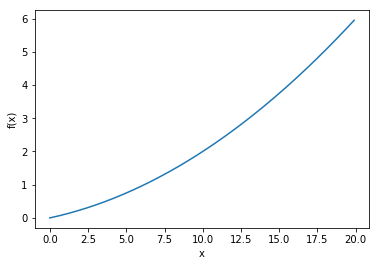

In [26]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0,20.0,0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()



In [29]:
numerical_diff(function_1,5)

0.1999999999990898

In [30]:
numerical_diff(function_1,10)

0.2999999999986347

In [0]:
#@title 4.3.3 偏微分

def function_2(x):
  return x[0]**2 + x[1]**2


In [31]:
def function_tmp1(x0):
  return x0*x0 + 4.0**2

numerical_diff(function_tmp1,3.0)

6.00000000000378

In [32]:
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2,4.0)

7.999999999999119

In [0]:
def numerical_gradient(f,x):
  h = 1e-4
  grad = np.zeros_like(x)
  
  for idx in range(x.size):
    tmp_val = x[idx]
    #f(x+h)の計算
    x[idx] = tmp_val + h
    fxh1 = f(x)
    
    #f(x-h)の計算
    x[idx] = tmp_val - h
    fxh2 = f(x)
    
    grad[idx] = (fxh1 -fxh2)/(2*h)
    x[idx] = tmp_val
    
  return grad
    

In [40]:
numerical_gradient(function_2,np.array([3.0,4.0]))


array([6., 8.])

In [41]:
numerical_gradient(function_2,np.array([0.0,2.0]))

array([0., 4.])

In [42]:
numerical_gradient(function_2,np.array([3.0,2.0]))

array([6., 4.])

In [0]:
#@title 4.4.1 勾配法

In [0]:
def gradient_descent(f,init_x,lr=0.01,step_num=100):
  x = init_x
  
  for i in range(step_num):
    grad = numerical_gradient(f,x)
    x -= lr * grad
  
  return x

In [46]:
def function_2(x):
  return x[0]**2 + x[1]**2

init_x = np.array([03.0,4.0])
gradient_descent(function_2,init_x=init_x, lr =0.1,step_num=100)

array([6.11110793e-10, 8.14814391e-10])

In [47]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=10.0,step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [48]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x=init_x,lr=1e-10,step_num=100)

array([-2.99999994,  3.99999992])

In [0]:
#@title 4.4.2 ニューラルネットワークに対する勾配

In [0]:
import sys,os
sys.path.append("./deep-learning-from-scratch")

In [0]:
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [0]:
class simpleNet:
  def __init__(self):
    self.W = np.random.randn(2,3)
    
  def predict(self,x):
    return np.dot(x,self.W)
  
  def loss(self,x,t):
    z = self.predict(x)
    y = softmax(z)
    loss = cross_entropy_error(y,t)
    
    return loss

In [61]:
net = simpleNet()
print(net.W)

[[ 1.56802046  0.823818    1.5538903 ]
 [ 0.0362426  -0.62183866  0.5226513 ]]


In [0]:
x = np.array([0.6,0.9])

In [0]:
p = net.predict(x)

In [64]:
print(p)

[ 0.97343061 -0.065364    1.40272036]


In [0]:
t = np.array([0,0,1])

In [66]:
net.loss(x,t)

0.6319828509520187

In [0]:
def f(W):
  return net.loss(x,t)

In [0]:
dW = numerical_gradient(f,net.W)

In [69]:
print(dW)

[[ 0.20760904  0.07346889 -0.28107793]
 [ 0.31141356  0.11020334 -0.42161689]]


In [0]:
f = lambda w: net.loss(x,t)
dW = numerical_gradient(f,net.W)

In [0]:
#@title 4.5.1 ２層ニューラルネットワークのクラス

In [0]:
import sys,os 
sys.path.append("./deep-learning-from-scratch")
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
  def __init__(self, input_size , hidden_size ,output_size, 
              weight_init_std=0.01):
    #重みの初期化
    self.params = {}
    self.params['W1'] = weight_init_std * \
                        np.random.randn(input_size , hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * \
                        np.random.randn(hidden_size , output_size)
    self.params['b2'] = np.zeros(output_size)
    
  def predict(self,x):
    W1,W2 = self.params['W1'],self.params['W2']
    b1,b2 = self.params['b1'],self.params['b2']
    
    a1 = np.dot(x,W1)+b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2 ) + b2
    y = softmax(a2)
    
  def loss(self,x,t):
    y = self.predict(X)
    return cross_entropy_error(y,t)
  
  def accuracy(self,x,t):
    y = self.predict(x)
    y = np.argmax(y,axis =1)
    t = np.argmax(t,axis=1)
    
    
    accuracy = np.sum(y==t)/float(x.shape[0])
    return accuracy
  
  def numerical_gradient(self,x,t):
    loss_W = lambda W: self.loss(x,t)
    
    grads = {}
    grads['W1'] = numerical_gradient(loss_W,self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W,self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W,self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W,self.params['b2'])
    
    return grads

In [73]:
net  = TwoLayerNet(input_size=784,hidden_size=100,output_size=10)
net.params['W1'].shape

(784, 100)

In [74]:
net.params['b1'].shape

(100,)

In [75]:
net.params['W2'].shape

(100, 10)

In [76]:
net.params['b2'].shape

(10,)